# Maschinelles Lernen
# Aufgabenblatt 06 - Aufgabe 02
# Prof. Dr. David Spieler

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [3]:
df = pd.read_csv('data/Auto.csv')

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
# fehlende Werte in horsepower, die mit '?' kodiert sind
df = df[df.horsepower != '?']

In [6]:
# wir imoutieren die fehlenden Werte mit dem Median
mpg_median = np.median(df['mpg'])
y = df['mpg'].apply(lambda x: 1 if x > mpg_median else 0)

In [7]:
X = df.drop(columns = ['mpg', 'name'])

In [8]:
# SVC: support vector classifier 
scores = []
grid = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
for c in grid:
    print(c)
    svc = SVC(C=c, kernel='linear')
    score = cross_val_score(svc, X, y, cv = 5, scoring='accuracy')
    scores.append(score.mean())

0.01
0.02
0.05
0.1
0.2
0.5
1.0
2.0
5.0
10.0


Text(0, 0.5, 'accuracy (mean)')

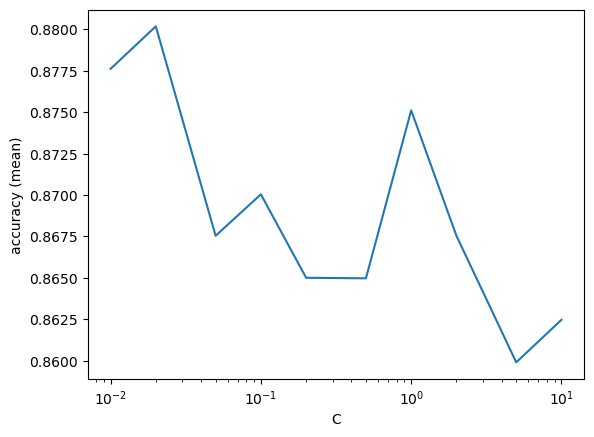

In [9]:
plt.semilogx(grid, scores)
plt.xlabel('C')
plt.ylabel('accuracy (mean)')

In [10]:
scores

[0.8776046738072054,
 0.880168776371308,
 0.8675430055176889,
 0.8700421940928269,
 0.8650113599480687,
 0.8649789029535864,
 0.8751054852320674,
 0.8675430055176891,
 0.8599156118143461,
 0.8624797143784486]

# Aufgabe 2.6
Die Entscheidung fällt auf C=0.01 oder C=5, da hier die Genauigkeit am besten ist.

0.01
0.05
0.1
0.2
0.5
1.0


[0.7677627715795655,
 0.8648072029751419,
 0.8750244666275201,
 0.874985320023488,
 0.8698766881972989,
 0.8749657467214719]

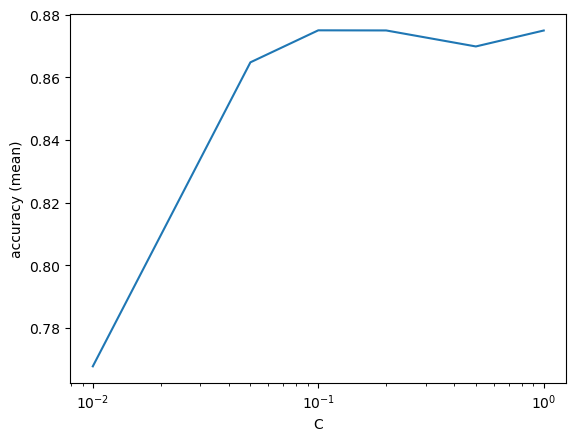

In [11]:
scores = []
grid = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
for c in grid:
    print(c)
    svc = SVC(C=c, kernel='poly', degree=2)
    score = cross_val_score(svc, X, y, cv = 3, scoring='accuracy')
    scores.append(score.mean())
plt.semilogx(grid, scores)
plt.xlabel('C')
plt.ylabel('accuracy (mean)')
scores

# Aufgabe 2.7
- Die Laufzeit hat sich dramatisch erhöht.
- Die Genauigkeit hat trotz komplexerem Modell (Polynom statt Linear) eher abgenommen, was für eine Überanpassung sprechen würde.

0.001
0.01
0.05
0.1
0.2
0.5
1.0
2.0
5.0


[0.5513016245840673,
 0.5513016245840673,
 0.5513016245840673,
 0.7141514973576042,
 0.7676844783715012,
 0.8671951458211001,
 0.8799765120375808,
 0.8748678802113915,
 0.8596007046388726]

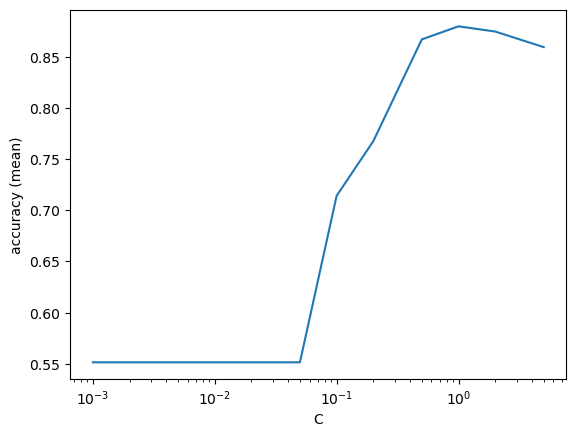

In [12]:
scores = []
grid = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0]
for c in grid:
    print(c)
    svc = SVC(C=c, kernel='rbf', gamma = 0.001)
    score = cross_val_score(svc, X, y, cv = 3, scoring='accuracy')
    scores.append(score.mean())
plt.semilogx(grid, scores)
plt.xlabel('C')
plt.ylabel('accuracy (mean)')
scores

# Aufgabe 2.8
Mit $\gamma=0.001$ und $C=1.0$ lässt sich ein marginal besseres Modell als das lineare Modell finden. Auch das Fitting geht deutlich schneller.